<a href="https://colab.research.google.com/github/Manishsingh89716/Grwointern_Internship/blob/main/Hand_digit_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task2:- Hand written digit recognition

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist

#Splitting into train and test
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784.
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

# Data is converted into float32 to use 32-bit precision # when training a neural network
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_1 = Sequential()

# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_1.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax'))

In [10]:
# Compiling the model.
model_1.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Training the model.
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2)

Epoch 1/70
750/750 [==============================] - 3s 3ms/step - loss: 1.0863 - accuracy: 0.7512 - val_loss: 0.6525 - val_accuracy: 0.8612
Epoch 2/70
750/750 [==============================] - 2s 2ms/step - loss: 0.6031 - accuracy: 0.8579 - val_loss: 0.5052 - val_accuracy: 0.8812
Epoch 3/70
750/750 [==============================] - 2s 3ms/step - loss: 0.5088 - accuracy: 0.8729 - val_loss: 0.4476 - val_accuracy: 0.8884
Epoch 4/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4633 - accuracy: 0.8808 - val_loss: 0.4160 - val_accuracy: 0.8928
Epoch 5/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4352 - accuracy: 0.8854 - val_loss: 0.3949 - val_accuracy: 0.8959
Epoch 6/70
750/750 [==============================] - 3s 3ms/step - loss: 0.4156 - accuracy: 0.8895 - val_loss: 0.3800 - val_accuracy: 0.9000
Epoch 7/70
750/750 [==============================] - 2s 3ms/step - loss: 0.4011 - accuracy: 0.8926 - val_loss: 0.3690 - val_accuracy: 0.9017
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


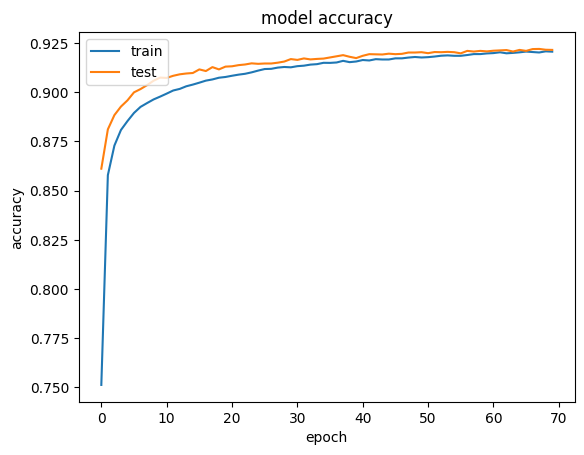

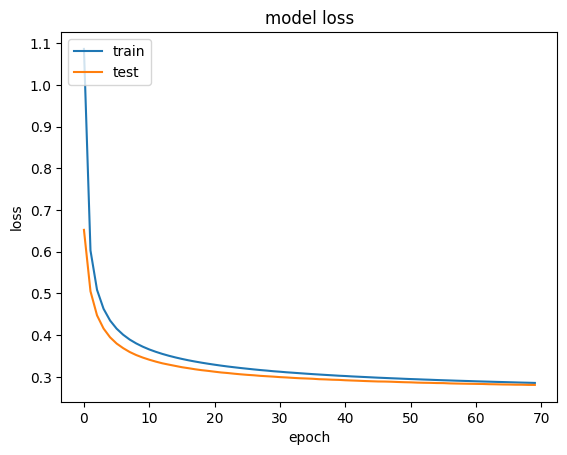

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.2819 - accuracy: 0.9216
Test accuracy: 0.9215999841690063


In [15]:
model_1.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [16]:
#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:

model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

# Compiling the model.
model_2.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model.
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2)

Epoch 1/100
750/750 [==============================] - 4s 4ms/step - loss: 1.1507 - accuracy: 0.6984 - val_loss: 0.5042 - val_accuracy: 0.8723
Epoch 2/100
750/750 [==============================] - 3s 4ms/step - loss: 0.4344 - accuracy: 0.8811 - val_loss: 0.3536 - val_accuracy: 0.9005
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.3455 - accuracy: 0.9022 - val_loss: 0.3056 - val_accuracy: 0.9133
Epoch 4/100
750/750 [==============================] - 3s 5ms/step - loss: 0.3053 - accuracy: 0.9131 - val_loss: 0.2797 - val_accuracy: 0.9198
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2785 - accuracy: 0.9196 - val_loss: 0.2577 - val_accuracy: 0.9258
Epoch 6/100
750/750 [==============================] - 3s 4ms/step - loss: 0.2583 - accuracy: 0.9266 - val_loss: 0.2380 - val_accuracy: 0.9308
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2414 - accuracy: 0.9316 - val_loss: 0.2269 - val_accuracy: 0.9338

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


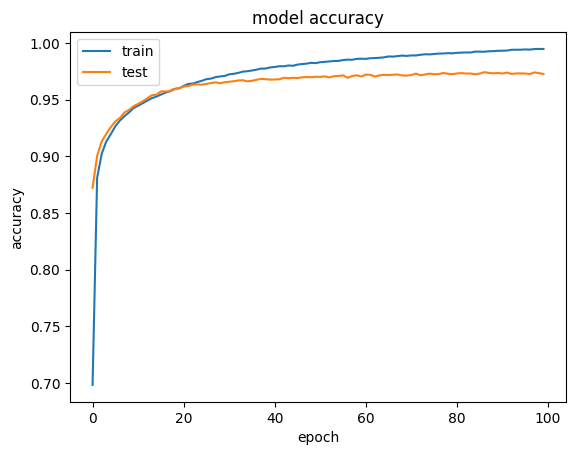

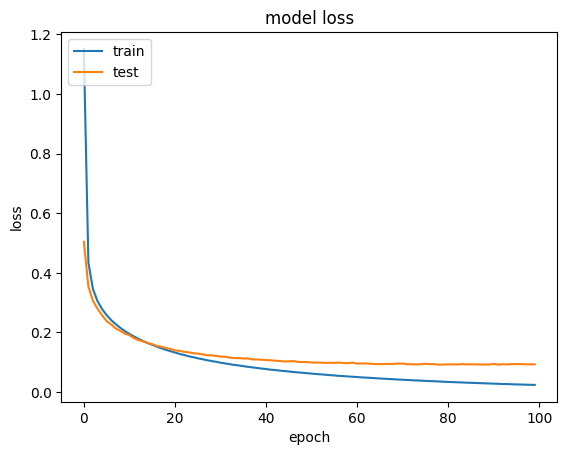

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2819 - accuracy: 0.9216
Test accuracy: 0.9215999841690063


In [19]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
N_hidden = 128


# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))

#Adding a dropout layer to avoid the overfitting
model_3.add(Dropout(0.3))

# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

# Compiling the model.
model_3.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model.
training = model_3.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 5s 6ms/step - loss: 1.3326 - accuracy: 0.5794 - val_loss: 0.5394 - val_accuracy: 0.8664
Epoch 2/50
750/750 [==============================] - 6s 8ms/step - loss: 0.6505 - accuracy: 0.8019 - val_loss: 0.3756 - val_accuracy: 0.8984
Epoch 3/50
750/750 [==============================] - 4s 6ms/step - loss: 0.5146 - accuracy: 0.8446 - val_loss: 0.3195 - val_accuracy: 0.9096
Epoch 4/50
750/750 [==============================] - 5s 6ms/step - loss: 0.4485 - accuracy: 0.8677 - val_loss: 0.2855 - val_accuracy: 0.9178
Epoch 5/50
750/750 [==============================] - 4s 5ms/step - loss: 0.4051 - accuracy: 0.8818 - val_loss: 0.2615 - val_accuracy: 0.9234
Epoch 6/50
750/750 [==============================] - 4s 5ms/step - loss: 0.3730 - accuracy: 0.8911 - val_loss: 0.2425 - val_accuracy: 0.9277
Epoch 7/50
750/750 [==============================] - 6s 7ms/step - loss: 0.3486 - accuracy: 0.8986 - val_loss: 0.2268 - val_accuracy: 0.9323
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


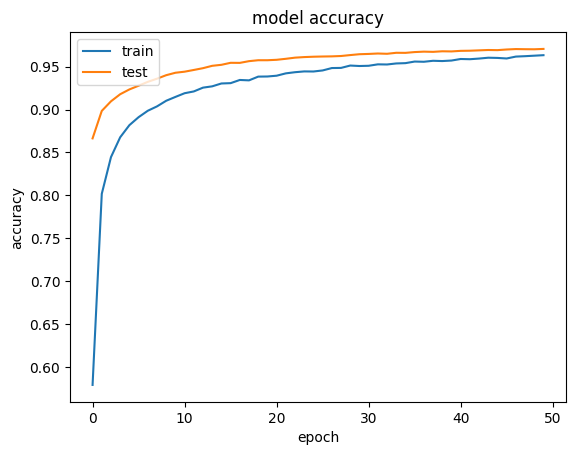

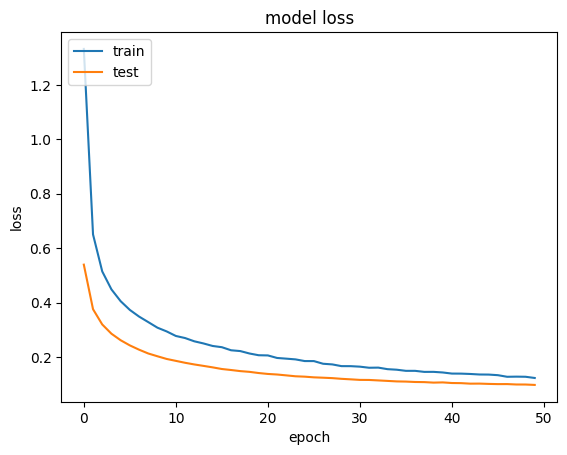

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0854 - accuracy: 0.9738
Test accuracy: 0.973800003528595


In [22]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

# Compiling the model.
model_4.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model.
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2)


Epoch 1/31
375/375 [==============================] - 9s 21ms/step - loss: 0.2998 - accuracy: 0.9093 - val_loss: 0.1266 - val_accuracy: 0.9609
Epoch 2/31
375/375 [==============================] - 10s 28ms/step - loss: 0.1262 - accuracy: 0.9613 - val_loss: 0.0962 - val_accuracy: 0.9708
Epoch 3/31
375/375 [==============================] - 9s 23ms/step - loss: 0.0939 - accuracy: 0.9701 - val_loss: 0.0954 - val_accuracy: 0.9718
Epoch 4/31
375/375 [==============================] - 8s 22ms/step - loss: 0.0701 - accuracy: 0.9781 - val_loss: 0.0792 - val_accuracy: 0.9768
Epoch 5/31
375/375 [==============================] - 8s 21ms/step - loss: 0.0613 - accuracy: 0.9800 - val_loss: 0.0849 - val_accuracy: 0.9753
Epoch 6/31
375/375 [==============================] - 9s 24ms/step - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.0784 - val_accuracy: 0.9787
Epoch 7/31
375/375 [==============================] - 8s 20ms/step - loss: 0.0467 - accuracy: 0.9849 - val_loss: 0.0852 - val_accuracy: 0.977

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


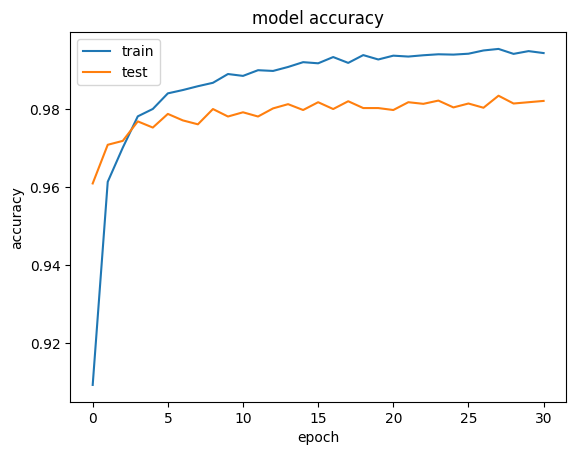

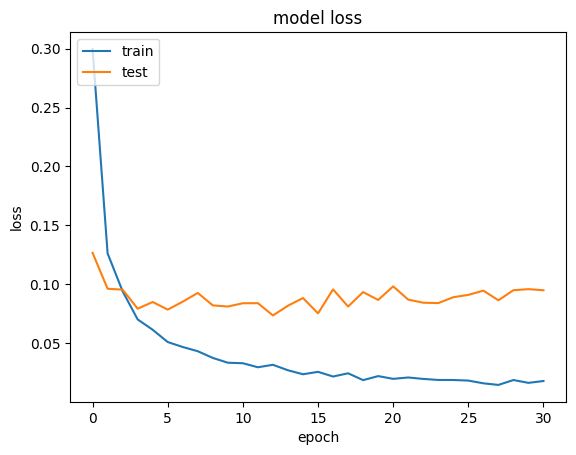

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.0765 - accuracy: 0.9838
Test accuracy: 0.9837999939918518


Our final model accuracy is 98%.